In [84]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imsave
from skimage.transform import resize
from tqdm import tqdm

np.random.seed(1)

In [85]:
img = imread('image.jpg')
img = resize(img, (300,300), anti_aliasing=True)

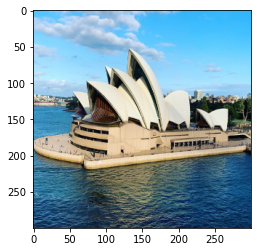

In [86]:
plt.imshow(img)

In [87]:
n_iter = 100000000
k = 4
r = 1.5   
s = 80
H,W = 300, 300
P = np.random.uniform(size=(k,3))
Z_init = np.random.choice(np.arange(1,k+1), size=(H,W))
Z = Z_init.copy()
Z_gen = Z.copy()
C_init = np.zeros((H,W,3))

In [90]:
for _ in tqdm(range(1,n_iter)):
    y = np.random.choice(np.arange(H))
    x = np.random.choice(np.arange(W))
    zprime = np.random.choice(np.arange(1,k+1))
    
    # Pz
    sum_prev = 0;
    sum_new = 0;
    for i in range(-1,2):
        for j in range(-1,2):
            col, row = y-i, x-j
            if i==0 and j==0:
                continue
            if col<0 or col>H-1:
                continue
            if row<0 or row>W-1:
                continue
                
            sum_prev += Z[y,x] == Z[col, row]
            sum_new += zprime == Z[col, row]
    
    # P_p,z
    C_prev_yxl = np.abs(P[Z[y,x]-1,...]-img[y,x,...])
    C_new_yxl = np.abs(P[zprime-1,...]-img[y,x,...])
    
    alpha =  np.exp(r*(sum_new-sum_prev)-s*(np.sum(C_new_yxl-C_prev_yxl)))
    
    if np.random.uniform() < alpha:
        Z_gen[y,x] = zprime
    else:
        Z_gen[y,x] = Z[y,x]
        
    Z = Z_gen

100%|██████████| 9999999/9999999 [15:42<00:00, 10607.25it/s]


In [91]:
output = np.zeros((H,W,3))
for c in range(k): 
    output[Z_gen==c+1,...] = P[c,...] 

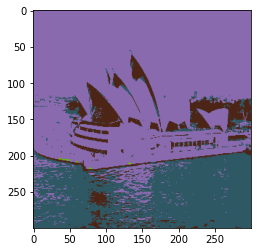

In [92]:
plt.imshow(output)